<span style="font-size:2em;">**Kaggle Red Wine Quality Dataset**</span>|

The Red Wine Quality dataset contains information about various physicochemical properties of wines. Each wine has a quality label associated with it. The quality label is in the range of 0 to 10.

This dataset only has numeric variables:

- **fixed acidity:** Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). It is measured in g/dm3.
- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/dm3 for red table wine. It is measured in g/dm3.
- **citric acid:** The amount of citric acid in wine, which is usually most of it is consumed during the fermentation process . It acts as a preservative to increase acidity, small quantities can add 'freshness' and flavor to wines. It is measured in g/dm3.
- **residual sugar:** The amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are sweet. It is measured in g/dm3.
- **chlorides:** The amount of salt in the wine.
- **free sulfur dioxide:** The amount of sulfur dioxide (SO2) in free form. Prevents microbial growth and the oxidation of wine. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.
- **total sulfur dioxide:** The total amount of SO2 in the wine. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour. It is measured in mg/dm3.
- **density:** The density of the wine is close to that of water depending on the percentage of alcohol and sugar, i.e., sweeter wines have higher density. It is generally used as a measure of the conversion of sugar to alcohol.
- **pH:** Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).
- **sulphates:** The amount of potassium sulphate in the wine. These are mineral salts containing sulfur. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are connected to the fermentation process and affects the wine aroma and flavor. 
- **alcohol:** Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % vol or alcohol by volume (ABV).
- **quality:** Ranged from 1 to 10. Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

# Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

# Descriptive Statistics

In [2]:
df_wine = pd.read_csv('../data/raw/winequality-red.csv')
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Most wines have a lower density than water, which means they are not too sweet.

All wines have a pH less than or equal to 4.01, so they are acidic.

75% of wines have at most 11.1 alcohol and the wine with more alcohol has 14.9.

Quality goes from 3 to 8 and the mean is 5.64.

In [5]:
# Check missing values
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Visualization

**What is the proportion of each quality level?**

In [6]:
quality = df_wine["quality"].value_counts().sort_index(ascending=True)

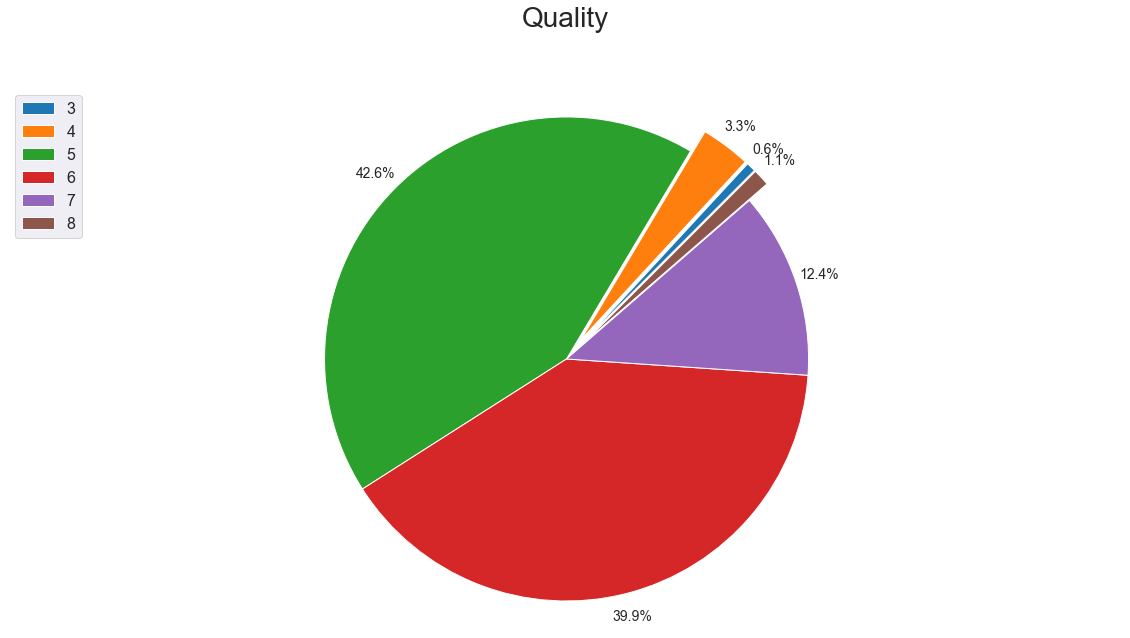

In [7]:
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Quality', size = 28, y=1.1)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="upper left", fontsize=16);

82.5% of the wines have an average quality (5 or 6).

**How is alcohol concentration distributed?**

/Users/joaogoncalves/Documents/code/notebooks/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


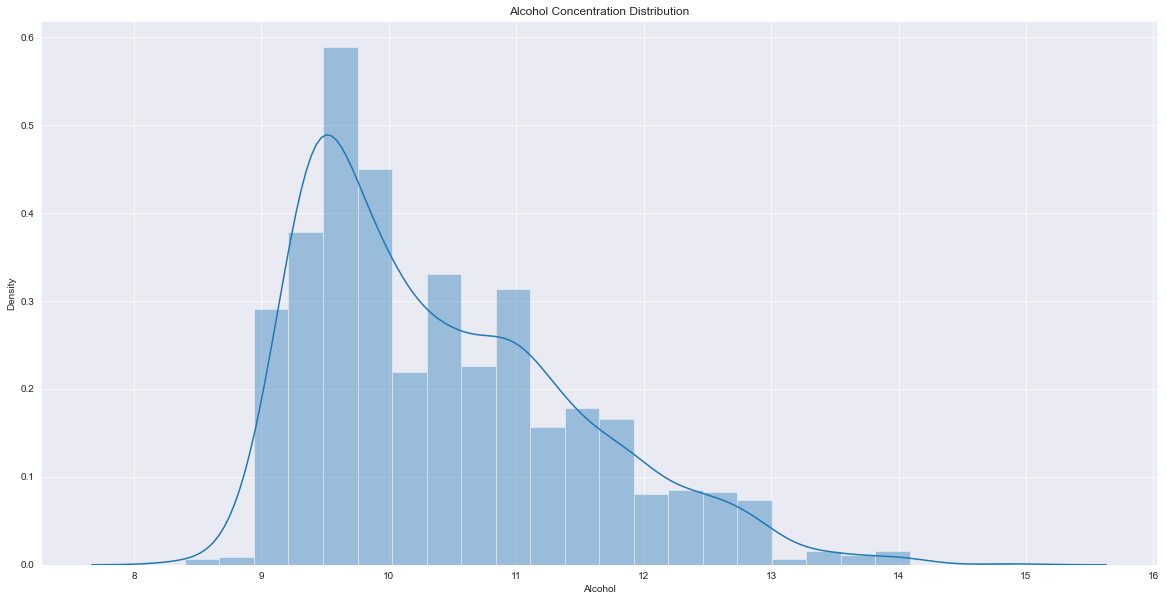

In [19]:
plt.figure(figsize=(20,10))
ax = sns.distplot(df_wine['alcohol'])
ax.set(title='Alcohol Concentration Distribution', ylabel='Density', xlabel='Alcohol');

The alcohol distribution is positively skewed. Let's check this using the **skew** method.

In [24]:
print(f"Alcohol skew: {skew(df_wine['alcohol'])}")

Alcohol skew: 0.8600210646566755


**Let's have a look at the other features distribution.**

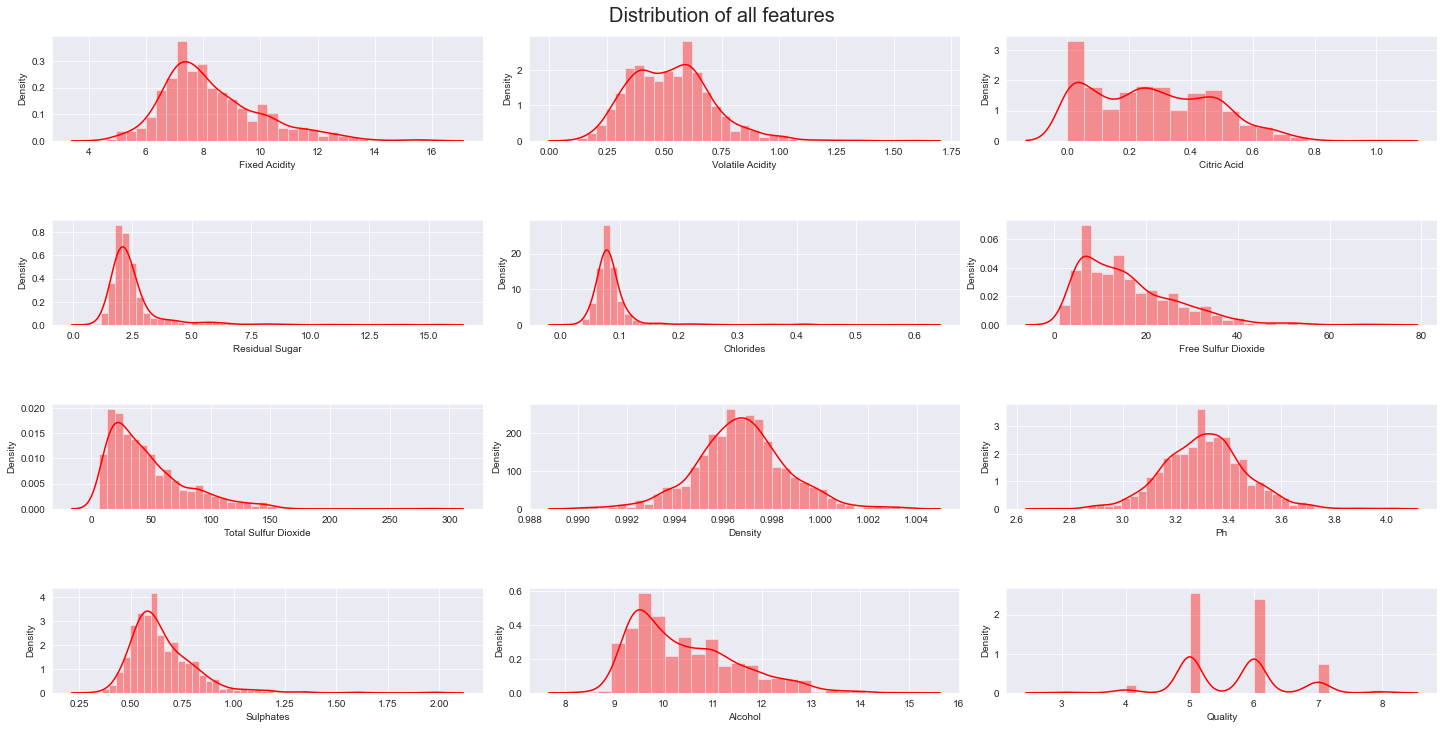

In [44]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(20,10), )
index = 0
ax = ax.flatten()

for col, value in df_wine.items():
    sns.distplot(value, color='r', ax=ax[index])
    ax[index].set(xlabel=col.title(), ylabel="Density")
    index += 1
fig.suptitle("Distribution of all features", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

A few features are normally distributed where other are rightly skewed.

**Which wine characteristics are related?**

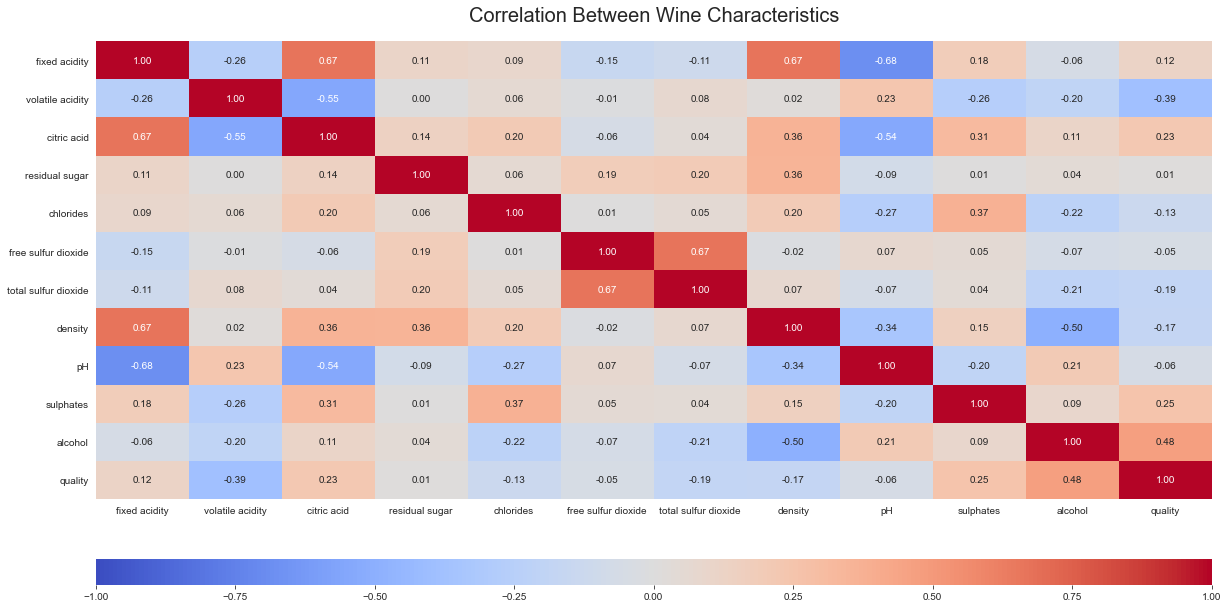

In [11]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(df_wine.corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('Correlation Between Wine Characteristics', size = 20, pad=20);

* Positive correlations (>= 0.25):
    - Fixed acidity - Citric acid
    - Fixed acidity - Density
    - Citric acid - Density
    - Citric acid - Sulphates
    - Residual sugar - Density
    - Chlorides - Sulphates
    - Free sulfur dioxide - Total sulfur dioxide
    - Sulphates - Quality
    - Alchohol - Quality


* Negative correlations (<= -0.25):
    - Fixed acidity - Volatile acidity
    - Fixed acidity - pH
    - Volatile acidity - Citric acid
    - Volatile acidity - Sulphates
    - Volatile acidity - Quality
    - Citric acid - pH
    - Chlorides - pH
    - Density - pH
    - Density - Alcohol

Hypothesis:
 - Sulphates and alcohol have positive influence in the quality
 - Volatile acidity has negative influence in the quality

**Hypothesis check: Alcohol have positive influence in the quality**

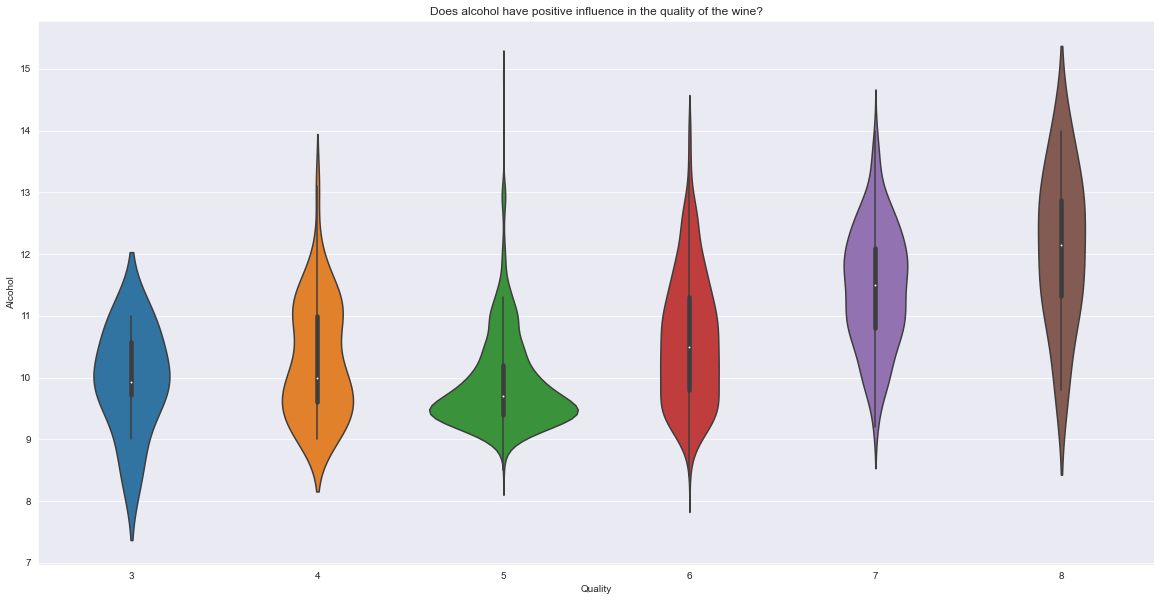

In [48]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='quality', y='alcohol', data = df_wine)
ax.set(title="Does alcohol have positive influence in the quality of the wine?", xlabel="Quality", ylabel="Alcohol");

This hypothesis remains true, the higher the alcohol concentration is, the higher the quality of the wine.

**Hypothesis check: Sulphates have positive influence in the quality**

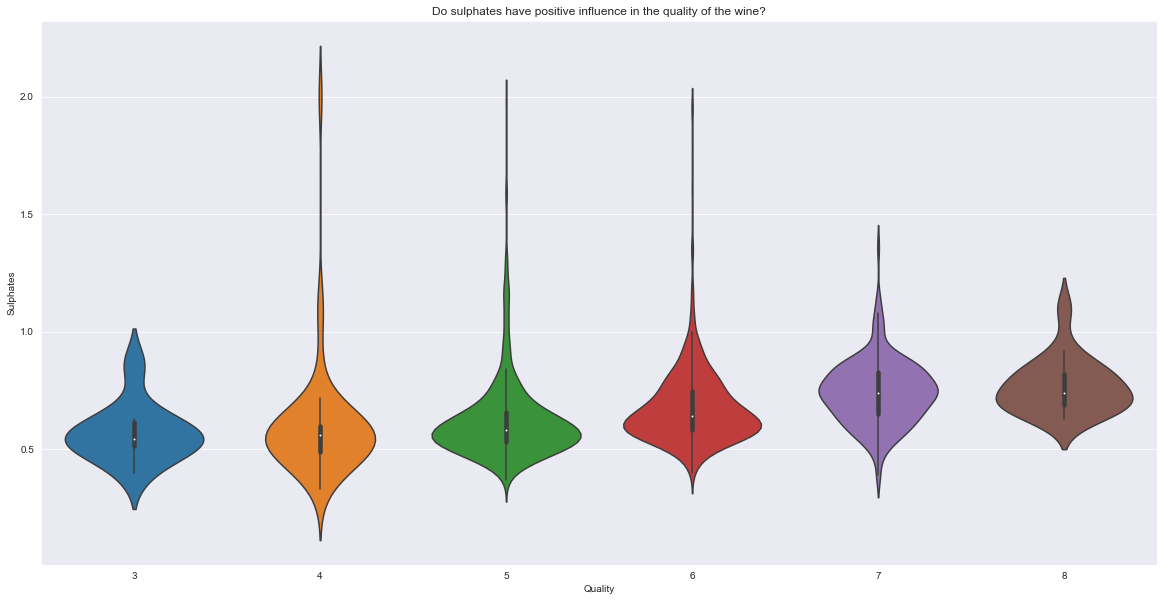

In [51]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='quality', y='sulphates', data = df_wine)
ax.set(title="Do sulphates have positive influence in the quality of the wine?", xlabel="Quality", ylabel="Sulphates");

This hypothesis remains true, the higher the concentration of sulphates is, the higher the quality of the wine.

**Hypothesis check: Volatile acidity has negative influence in the quality**

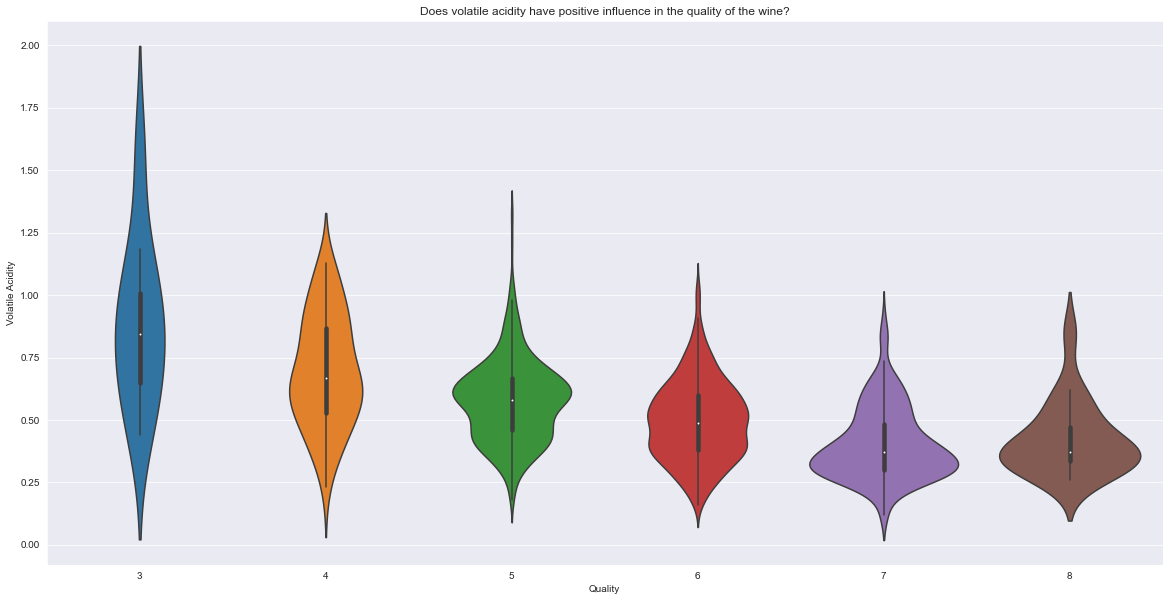

In [54]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='quality', y='volatile acidity', data = df_wine)
ax.set(title="Does volatile acidity have positive influence in the quality of the wine?", xlabel="Quality", ylabel="Volatile Acidity");

This hypothesis remains true, the higher volatile acidity, the lower the quality of the wine.

**How do sulphates and alcohol influence the quality of a wine?**

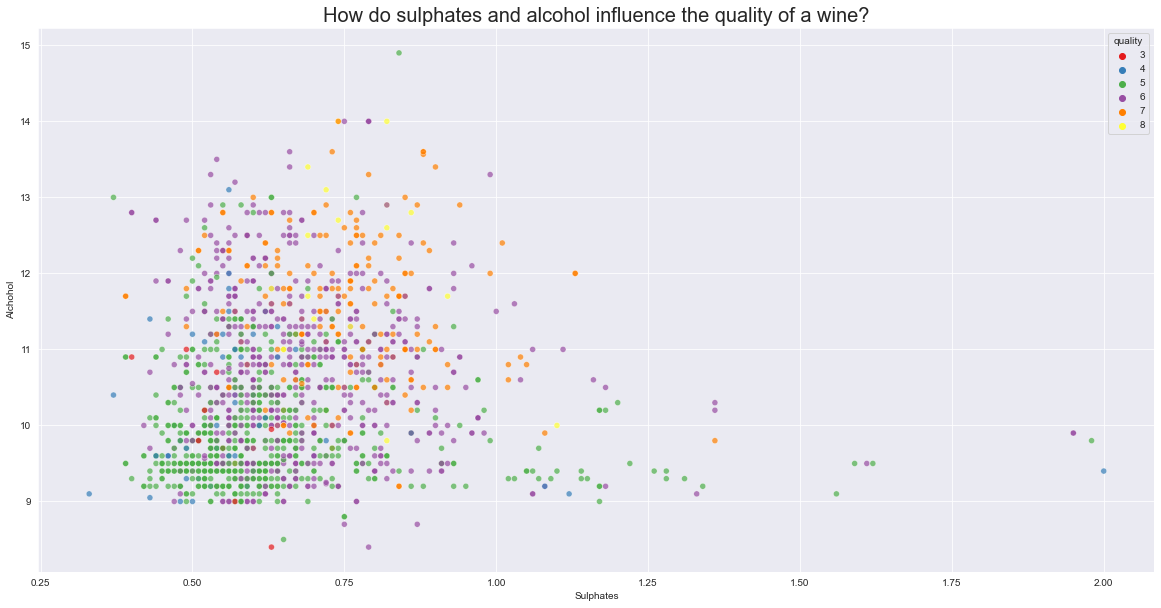

In [57]:
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x = "sulphates", y = "alcohol", hue = "quality",data = df_wine, alpha = 0.7, palette = "Set1")
ax.set_title("How do sulphates and alcohol influence the quality of a wine?", size = 20)
ax.set(xlabel="Sulphates", ylabel="Alchohol");

Let's look at each of the quality levels separately.

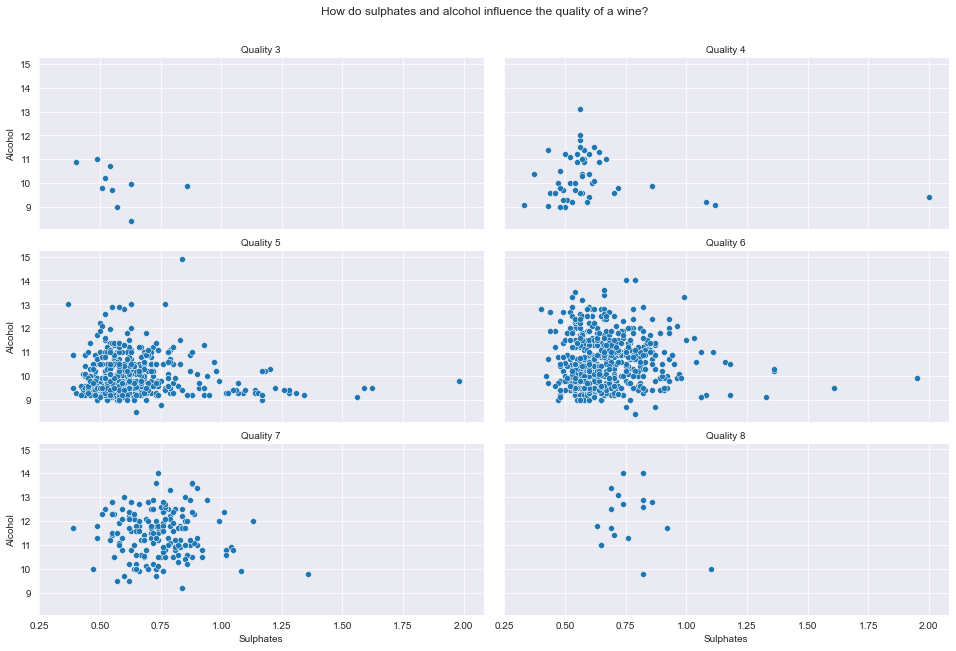

In [60]:
g = sns.FacetGrid(df_wine, col="quality", col_wrap=2, aspect=2.2)
g.map_dataframe(sns.scatterplot, x = "sulphates", y = "alcohol")
g.set_axis_labels("Sulphates", "Alcohol")
g.set_titles("Quality {col_name:d}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("How do sulphates and alcohol influence the quality of a wine?");

Good wines: alcohol > 11 and sulphates between 0.5 and 1.

TODO: 

- Citric acid vs Quality + Density vs Quality +  Ph vs quality + Chlorides vs Quality - violinplot

- Residual sugar vs alcohol vs quality - kde plot and categorize quality

- Volatile acidity vs alcohol vs quality - scatter plot as above. wines’ alcohol level between 9% to 12%, the level of volatile acidity decreases as the wines’ alcohol level increases. For higher alcohol content (>12% ), the pattern reverses, implying high-quality wines’ popularity.

- Citric acid vs alcohol vs quality - alcohol percentage level below 14, as the level of citric acid increases, there is a rise in red wines’ quality. The only exception was at alcohol 14%, where the citric acid level drops as the wine’s quality increases.

there are positive relationships between quality and critic.acid, alcohol, and sulphates

there are negative relationships between quality and volatile.acidity, density, and pH.

# References

1. [Red Wine Quality - Exploratory Data Analysis](https://www.kaggle.com/harshjain123/red-wine-quality-exploratory-data-analysis/notebook)
2. [Multi-dimensional Data Visualization | EDA](https://www.kaggle.com/piyushagni5/multi-dimensional-data-visualization-eda/notebook)
3. [Red Wine Quality EDA & Classification](https://www.kaggle.com/sercanyesiloz/red-wine-quality-eda-classification)
4. [Red Wine Quality Prediction Using Regression Modeling and Machine Learning](https://www.kaggle.com/piyushagni5/multi-dimensional-data-visualization-eda/notebook)